
<h1>Bike Sharing Assignment

In [79]:
#Import Required Libraries
import numpy as np
import pandas as pd

#Import Matplot Library
import matplotlib.pyplot as plt

#Import Seaborn
import seaborn as sns


In [21]:
import statsmodels
import statsmodels.api as sm
import sklearn

In [6]:
#Read data
bikesharing=pd.read_csv('day.csv')


<h2>Data understanding, preparation and EDA


In [7]:
#inspect first 5data
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
#Get dataset information
bikesharing.info()
#Data shows all are not null values
#Dteday is an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#Get dataset description
bikesharing.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
#Get the shape of the dataset
bikesharing.shape

(730, 16)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

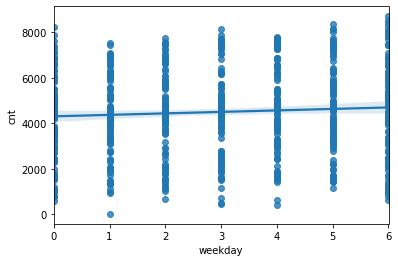

In [15]:
sns.regplot(x='weekday',y='cnt',data=bikesharing)



Compare All Plots 
        

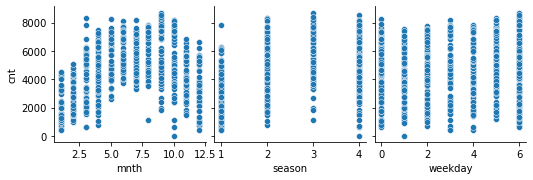

In [19]:
sns.pairplot(data=bikesharing,x_vars=['mnth','season','weekday'],y_vars='cnt')


In [18]:
bikesharing.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


In [24]:
bikesharing['dteday'].dtype

dtype('O')

In [25]:
#Converting to datetime format
bikesharing['dteday'] =  pd.to_datetime(bikesharing['dteday'],format='%d-%m-%Y')
bikesharing['dteday'].dtype

dtype('<M8[ns]')

In [27]:
bikesharing['year'] = pd.DatetimeIndex(bikesharing['dteday']).year

In [37]:
bikesharing.head()

,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year
0,2018-01-01,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018
1,2018-01-02,1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018
2,2018-01-03,1,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018
3,2018-01-04,1,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018
4,2018-01-05,1,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018


In [36]:
#Drop unwanted data
bikesharing.drop(['instant','yr','casual','registered'],axis=1,inplace=True)

<h4>Mapping the values<br>
1. Season<br>
2. Month<br>
3. Weather<br>
4.Weekday</h4>

In [40]:
#1. Mapping Season
#season (1:spring, 2:summer, 3:fall, 4:winter)
m_season={1:'spring',2:'summer',3:'fall',4:'winter'}
bikesharing['season']=bikesharing['season'].map(m_season)

In [41]:
bikesharing.head()

,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year
0,2018-01-01,spring,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018
1,2018-01-02,spring,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018
2,2018-01-03,spring,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018
3,2018-01-04,spring,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018
4,2018-01-05,spring,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018


In [43]:
#2. Mapping Month
m_month={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
bikesharing['mnth']=bikesharing['mnth'].map(m_month)

In [44]:
bikesharing.head()

,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year
0,2018-01-01,spring,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018
1,2018-01-02,spring,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018
2,2018-01-03,spring,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018
3,2018-01-04,spring,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018
4,2018-01-05,spring,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018


In [47]:
#3. Mapping Weather
#1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'
m_weather={1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bikesharing['weathersit']=bikesharing['weathersit'].map(m_weather)
bikesharing.head()

,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year
0,2018-01-01,spring,Jan,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985,2018
1,2018-01-02,spring,Jan,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,2018
2,2018-01-03,spring,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018
3,2018-01-04,spring,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018
4,2018-01-05,spring,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018


In [49]:
#4. Mapping Weekday
#0:Sunday,6:Saturday
m_weekday={0:'Sun',1:'Mon',2:'Tues',3:'Wed',4:'Thus',5:'Fri',6:'Sat'}
bikesharing['weekday']=bikesharing['weekday'].map(m_weekday)
bikesharing.head()

,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year
0,2018-01-01,spring,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,2018
1,2018-01-02,spring,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,2018
2,2018-01-03,spring,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018
3,2018-01-04,spring,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018
4,2018-01-05,spring,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018


In [57]:
#Renaming columns for better undestanding
bikesharing=bikesharing.rename(columns={"dteday": "dates", "mnth": "month", "weathersit": "weather","hum": "humidity","cnt": "count"})
bikesharing.head()

,dates,season,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,year
0,2018-01-01,spring,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,2018
1,2018-01-02,spring,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,2018
2,2018-01-03,spring,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018
3,2018-01-04,spring,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018
4,2018-01-05,spring,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018


<h5>View the Data

<AxesSubplot:>

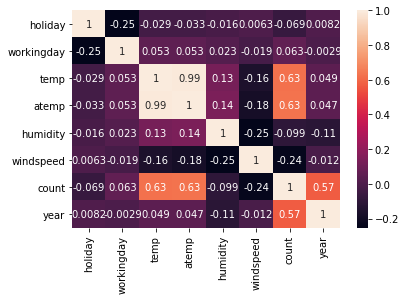

In [74]:
sns.heatmap(bikesharing.corr(),annot=True)

<AxesSubplot:>

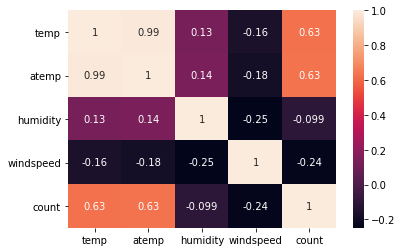

In [103]:
bike1=bikesharing[['temp','atemp','humidity','windspeed','count']]
sns.heatmap(bike1.corr(),annot=True)

temp and atemp corelation is almost 1, one of the avariable can be dropped

In [106]:
#Dropping atemp 
bikesharing.drop(['atemp'],axis=1,inplace=True)
bikesharing.head()

,dates,season,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,count,year
0,2018-01-01,spring,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985,2018
1,2018-01-02,spring,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801,2018
2,2018-01-03,spring,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,2018
3,2018-01-04,spring,Jan,0,Tues,1,Clear,8.200000,59.0435,10.739832,1562,2018
4,2018-01-05,spring,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600,2018


<AxesSubplot:xlabel='season', ylabel='count'>

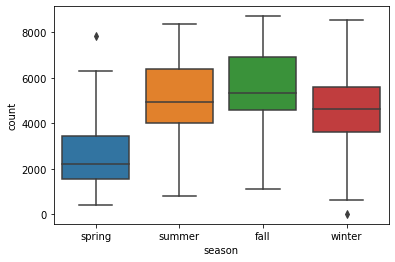

In [58]:
#Plot with Season:
sns.boxplot(x="season", y="count", data=bikesharing)

Looking at above plot we can see: <br>
    1. Bike are rented highest at fall. <br>
    2. Fall and summer withess almost similar amount of Bike rent.<br> 
    3. Spring has least amout of Bike rented.  

<AxesSubplot:xlabel='weekday', ylabel='count'>

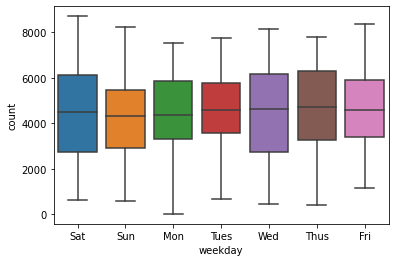

In [59]:
#Plot with Weekday:
sns.boxplot(x="weekday", y="count", data=bikesharing)

<AxesSubplot:xlabel='temp', ylabel='count'>

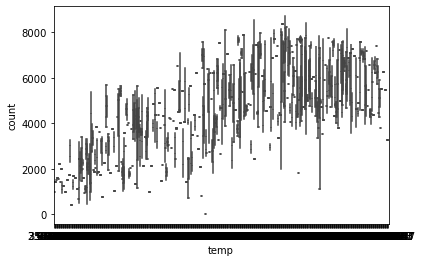

In [173]:
#Plot with Weekday:
sns.boxplot(x="temp", y="count", data=bikesharing)

The above data does not give much information

Looking at above plot we can see: <br>
    1. Bike are rented highest at September month. <br>
    2. Bikes rental is gradually increasing with month until Sept then it decreases .<br> 
    3. January and Feburary has least amout of Bike rented. 

<AxesSubplot:xlabel='workingday', ylabel='count'>

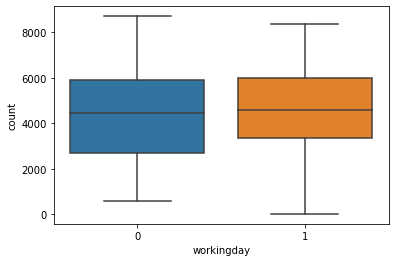

In [63]:
#Plot with workingday:
sns.boxplot(x="workingday", y="count", data=bikesharing)

<AxesSubplot:xlabel='year', ylabel='count'>

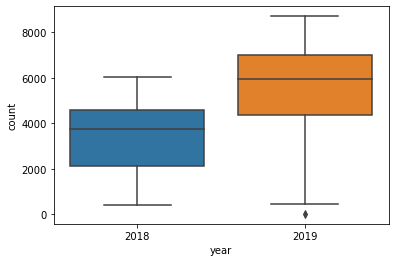

In [64]:
#Plot with Year:
sns.boxplot(x="year", y="count", data=bikesharing)

Looking at the above plot we can confirm that bikes were rented more in Year 2019 than in Year 2018  

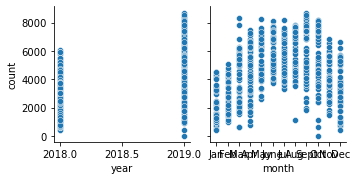

In [65]:
sns.pairplot(data=bikesharing,x_vars=['year','month'],y_vars='count')

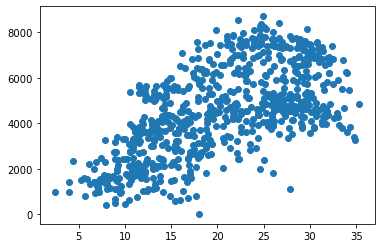

In [81]:
#Plot with temp:
plt.scatter('temp', y='count', data=bikesharing)

In [95]:
#Linear Regression

In [128]:
bikesharing.head()

,dates,season,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,count,year
0,2018-01-01,spring,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985,2018
1,2018-01-02,spring,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801,2018
2,2018-01-03,spring,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,2018
3,2018-01-04,spring,Jan,0,Tues,1,Clear,8.200000,59.0435,10.739832,1562,2018
4,2018-01-05,spring,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600,2018


In [141]:
#Create X and Y
X=bikesharing['temp']
y=bikesharing['count']
#Traintest split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)
X_train.shape



(510,)

In [142]:
y_train.shape


(510,)

In [143]:
y_test.shape


(220,)

In [144]:
X_train

576    29.246653
426    16.980847
728    10.489153
482    15.443347
111    13.803347
         ...    
578    30.852500
53      9.091299
350    10.591653
79     17.647835
520    22.174153
Name: temp, Length: 510, dtype: float64

In [145]:
#Train the model
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,temp
576,1.0,29.246653
426,1.0,16.980847
728,1.0,10.489153
482,1.0,15.443347
111,1.0,13.803347


In [146]:
#Fitting the model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    1080.739991
temp      169.313394
dtype: float64

In [147]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           2.46e-61
Time:                        18:17:00   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1080.7400    190.751      5.666      0.000     705.982    1455.498
temp         169.3134      8.899     19.026      0.000     151.830     186.797
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         62.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
bikesharing.head()

,dates,season,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,count,year
0,2018-01-01,spring,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985,2018
1,2018-01-02,spring,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801,2018
2,2018-01-03,spring,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,2018
3,2018-01-04,spring,Jan,0,Tues,1,Clear,8.200000,59.0435,10.739832,1562,2018
4,2018-01-05,spring,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600,2018


In [157]:
#Create X and Y
X=bikesharing[['temp','humidity','windspeed','year']]

y=bikesharing['count']
#Traintest split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)
X_train.shape

y_train.shape

y_test.shape

X_train

#Train the model
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

#Fitting the model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params


lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     349.1
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          7.75e-144
Time:                        18:21:26   Log-Likelihood:                -4248.8
No. Observations:                 510   AIC:                             8508.
Df Residuals:                     505   BIC:                             8529.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.055e+06   1.82e+05    -22.221      0.000   -4.41e+06    -3.7e+06
temp         151.8606      6.212     24.447      0.000     139.656     164.065
humidity     -21.3487      3.317     -6.435      0.000     -27.866     -14.831
windspeed    -68.4998      8.877     -7.717      0.000     -85.940     -51.059
year        2010.6387     90.400     22.242      0.000    1833.032    2188.245
==============================================================================
Omnibus:                       18.043   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.788
Skew:                          -0.386   Prob(JB):                     3.06e-05
Kurtosis:                       3.619   Cond. No.                     8.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
seasons = pd.get_dummies(bikesharing['season'],drop_first=True)
print(seasons)

     spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]


In [111]:
#Model Building 2
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)
#Fit the model
#Reshape
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)
lm.fit(X_train_lm,y_train_lm)

LinearRegression()

In [121]:
#Check Coff and intercept
print(lm.coef_)
print(lm.intercept_)

[[169.31339421]]
[1080.73999114]


In [122]:
#Predictions
y_train_pred=lm.predict(X_train_lm)
y_test_pred=lm.predict(X_test_lm)

In [127]:
#Evaluate
from sklearn.metrics import r2_score
print(r2_score(y_true=y_train,y_pred=y_train_pred))

0.4160873499525738


In [171]:
#Create X and Y
X=bikesharing['year']
y=bikesharing['count']
#Traintest split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)
X_train.shape

y_train.shape

y_test.shape

X_train

#Train the model
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

#Fitting the model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params


lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     273.3
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.95e-49
Time:                        18:55:58   Log-Likelihood:                -4477.1
No. Observations:                 510   AIC:                             8958.
Df Residuals:                     508   BIC:                             8967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.649e+06   2.81e+05    -16.516      0.000    -5.2e+06    -4.1e+06
year        2305.3959    139.455     16.531      0.000    2031.416    2579.376
==============================================================================
Omnibus:                       27.322   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.203
Skew:                          -0.560   Prob(JB):                     4.56e-07
Kurtosis:                       2.654   Cond. No.                     8.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Conclusion:</h3> <br>
    1. Bike renting has increased over the year.  <br>
    3. Bike renting is less at the starting of the month  <br>
    4. Bike renting is highest at Sept.  <br>
    5. Temperature has an direct effect on Bike renting.  <br>
    
    